In [1]:
#in this project we will compare the socieconomic of a list of individuals with their location and obesity level
#the goal is to do data cleaning then do an EDA analysis on the data to show more details and insight 
#finally build a model that help with predicting the the corralation between obesity and the factors using linear regression 
#lets start with importing the libraries we will need
#numpy to manipulate numbers, pandas to edit tables and merge and seaborn for visualization 
import sys
import numpy as np
import pandas as pd
import seaborn as sns

#matlap to plot alongside seaborn
import matplotlib 
import matplotlib.pyplot as plt

#sklearn to train the model for the education and income cases
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#this is a bonus that we did not cover in class
#Lux library is a tool for visualization but its different than the other
#in the fact that it shows you the options, will try to do it after finishing the project
#import lux

In [2]:
#now lets read the data and get info about it
data = pd.read_csv('Data.csv')

#let's look for missing data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [3]:
#as we can see we have 53392 entries and 33 features
#there is some missing values that we will manage

In [4]:
#let's take a look at how the data is without doing anything to it first
data.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2011     2011           AL      Alabama   
1       2011     2011           AL      Alabama   
2       2011     2011           AL      Alabama   
3       2011     2011           AL      Alabama   
4       2011     2011           AL      Alabama   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   

                     Topic                                           Question  \
0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
1  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
2  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
3  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
4  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   

   Data_Value_Unit Data_Value_Type  ...  \
0              NaN           Value  ...   
1              NaN           Value  ...   
2              NaN           Value  ...   
3              NaN           Value  ...   
4              NaN           Value  ...   

                               GeoLocation  ClassID TopicID QuestionID  \
0  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
1  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
2  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
3  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
4  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   

   DataValueTypeID  LocationID  StratificationCategory1  \
0            VALUE           1                    Total   
1            VALUE           1                   Gender   
2            VALUE           1                   Gender   
3            VALUE           1                Education   
4            VALUE           1                Education   

         Stratification1 StratificationCategoryId1 StratificationID1  
0                  Total                       OVR           OVERALL  
1                   Male                       GEN              MALE  
2                 Female                       GEN            FEMALE  
3  Less than high school                       EDU             EDUHS  
4   High school graduate                       EDU         EDUHSGRAD  

[5 rows x 33 columns]

In [5]:
#since we are looking to answer some questions regarding income, education and gender (number of people) 
#lets drop the data that is irrelevent to us here or have large missing values
#The variable Rem_data will hold the data after dropping
Rem_data = data.drop(['Low_Confidence_Limit',
                      'High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit',
                      'QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol',
                      'Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1)

#now lets look how the data changed from the start
Rem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Question                 53392 non-null  object 
 4   Data_Value               48346 non-null  float64
 5   Data_Value_Alt           48346 non-null  float64
 6   Sample_Size              48346 non-null  float64
 7   Total                    1907 non-null   object 
 8   Age(years)               11438 non-null  object 
 9   Education                7628 non-null   object 
 10  Gender                   3814 non-null   object 
 11  Income                   13349 non-null  object 
 12  Race/Ethnicity           15256 non-null  object 
 13  GeoLocation              52384 non-null  object 
 14  LocationID            

In [6]:
#also lets take a look at how the data look after dropping
Rem_data.head()

YearStart LocationAbbr LocationDesc  \
0       2011           AL      Alabama   
1       2011           AL      Alabama   
2       2011           AL      Alabama   
3       2011           AL      Alabama   
4       2011           AL      Alabama   

                                            Question  Data_Value  \
0  Percent of adults aged 18 years and older who ...        32.0   
1  Percent of adults aged 18 years and older who ...        32.3   
2  Percent of adults aged 18 years and older who ...        31.8   
3  Percent of adults aged 18 years and older who ...        33.6   
4  Percent of adults aged 18 years and older who ...        32.8   

   Data_Value_Alt  Sample_Size  Total Age(years)              Education  \
0            32.0       7304.0  Total        NaN                    NaN   
1            32.3       2581.0    NaN        NaN                    NaN   
2            31.8       4723.0    NaN        NaN                    NaN   
3            33.6       1153.0    NaN        NaN  Less than high school   
4            32.8       2402.0    NaN        NaN   High school graduate   

   Gender Income Race/Ethnicity                              GeoLocation  \
0     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)   
1    Male    NaN            NaN  (32.84057112200048, -86.63186076199969)   
2  Female    NaN            NaN  (32.84057112200048, -86.63186076199969)   
3     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)   
4     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)   

   LocationID StratificationCategory1        Stratification1  
0           1                   Total                  Total  
1           1                  Gender                   Male  
2           1                  Gender                 Female  
3           1               Education  Less than high school  
4           1               Education   High school graduate

In [7]:
#it is time to do the analysis to answer our question
#Questions: How does economy (income) affect obesity?
#Questions: Which states suffer from obesity the most for a chosen year? (location wise)
#Questions: What is some approaches that might limit the obesity levels? (depending on the data visualization)
#Questions: How does the obesity level differ as a function of education and income? (will seperate each one first)

In [8]:
#now lets get the data with respect to education and reset the index for better format 
data_Education = Rem_data[Rem_data['StratificationCategory1'] == 'Education']
data_Education = data_Education.reset_index(drop = True)

#now lets get the data with respect to Income and reset the index for better format 
data_Income = Rem_data[Rem_data['StratificationCategory1'] == 'Income']
data_Income = data_Income.reset_index(drop = True)

#now lets get the data with respect to Gender (number of people) and reset the index for better format 
data_Gender = Rem_data[(Rem_data['Stratification1'] =='Male') | (Rem_data['Stratification1'] =='Female')]
data_Gender = data_Gender.reset_index(drop = True)

In [9]:
#trying to see which year has the most data to choose as the year to do the analysis on
print(Rem_data[Rem_data.YearStart == 2011].shape)
print(Rem_data[Rem_data.YearStart == 2012].shape)
print(Rem_data[Rem_data.YearStart == 2013].shape)
print(Rem_data[Rem_data.YearStart == 2014].shape)
print(Rem_data[Rem_data.YearStart == 2015].shape)
print(Rem_data[Rem_data.YearStart == 2016].shape)

(13104, 17)
(4368, 17)
(13160, 17)
(4536, 17)
(13604, 17)
(4620, 17)


In [10]:
#from this we can ssee that the year 2015 has the most data therfore we will use it to do the analysis 
Rem_data.YearStart.value_counts()

2015    13604
2013    13160
2011    13104
2016     4620
2014     4536
2012     4368
Name: YearStart, dtype: int64

In [11]:
#after checking for the amount of data per year
#we will choose a year that has the most relevant data to the question we want to answer
#but first we need to see the question from the survey 
#the dataset has a survey question feature which propose a qouestion and the datavalue it has its value
#let's start with the gender group (number of people)
data_Gender['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

In [12]:
#Isolate the Question in from the survey to answer it 
#we will keep using this question because it is the only one relevant to the things we want answers to
#the other questions might be helpful for future analysis or more indepth but for the scope of this project they are not needed
Question = ['Percent of adults aged 18 years and older who have obesity',
   'Percent of adults aged 18 years and older who have an overweight classification']

#filter by that question
data_Gender = data_Gender[data_Gender['Question'] == Question[0]]

In [13]:
#now that we know which question we need to answer first and which year to work on let's start 
data_Gender = data_Gender[data_Gender['YearStart'] == 2015]
data_Gender.shape

(108, 17)

In [14]:
# lets split the location to get a function of year and location for the obesity
location = data_Gender[(data_Gender['LocationDesc'] == 'National')]

#we will remove unrelated state that will not serve in the region of the united statess
data_Gender = data_Gender[~(data_Gender ['LocationDesc'] == 'National')]
data_Gender = data_Gender[~(data_Gender ['LocationDesc'] == 'Guam')]
data_Gender = data_Gender[~(data_Gender ['LocationDesc'] == 'Puerto Rico')]
data_Gender = data_Gender[~(data_Gender ['LocationDesc'] == 'Virgin Islands')]
data_Gender['LocationDesc'].unique()

array(['Idaho', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Illinois', 'Georgia', 'Hawaii', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Louisiana',
       'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'South Dakota', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [15]:
#now that we have the data for the states readu as well lets
#sort them and pick the related features to the number of people which are 4
data_Gender_sorted = data_Gender.sort_values(['LocationDesc'], ascending = [True])
data_Gender_sorted = data_Gender_sorted[['LocationAbbr','LocationDesc','Data_Value','Gender']]

#take the mean
data_Gender_sorted = data_Gender_sorted.groupby('LocationDesc', as_index=False).mean()

#get the average over the whole national in term location
ave = sum(location['Data_Value']) / len(location)

In [16]:
#Here we will plot all the sates vs obesity rate for the year 2015
#red line is the average 
#most of the plot commands is directly from the matplotlab documentation and then changed it to go best with this project

#choose the font and the size of the font
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': 80})

#sort the states from least to most obese 
data_Gender_sorted = data_Gender_sorted.sort_values(['Data_Value'], ascending = [False])

#choose the size of the graph
plt.figure(figsize = (100,150))

#the font will be red (most obeset) to blue (least obese) with the average as a black line
ax = sns.barplot(y = data_Gender_sorted.LocationDesc, x = data_Gender_sorted.Data_Value,palette="RdBu")
ax.set_title('Obesity Rate (%) per States in 2015')
ax.set_ylabel('US States')
ax.set_xlabel('Obesity Rate (%)')

#choosing the color and the line shape
plt.plot([ave,ave],[-1,51], '-',color = 'k')

#plt show so that the graph print first then disply the average in number in case it can not be interpreted from the graph
plt.show()
print('The average Obesity Rate per States in 2015 is ',ave,'%')

The average Obesity Rate per States in 2015 is  28.85 %


In [17]:
#lets do the same thing we did for the rate per state to the education
#trying to find a corrolation between the obesity and the education level
data_Education.head()

YearStart LocationAbbr LocationDesc  \
0       2011           AL      Alabama   
1       2011           AL      Alabama   
2       2011           AL      Alabama   
3       2011           AL      Alabama   
4       2011           AL      Alabama   

                                            Question  Data_Value  \
0  Percent of adults aged 18 years and older who ...        33.6   
1  Percent of adults aged 18 years and older who ...        32.8   
2  Percent of adults aged 18 years and older who ...        33.8   
3  Percent of adults aged 18 years and older who ...        26.4   
4  Percent of adults aged 18 years and older who ...        33.2   

   Data_Value_Alt  Sample_Size Total Age(years)  \
0            33.6       1153.0   NaN        NaN   
1            32.8       2402.0   NaN        NaN   
2            33.8       1925.0   NaN        NaN   
3            26.4       1812.0   NaN        NaN   
4            33.2       1153.0   NaN        NaN   

                          Education Gender Income Race/Ethnicity  \
0             Less than high school    NaN    NaN            NaN   
1              High school graduate    NaN    NaN            NaN   
2  Some college or technical school    NaN    NaN            NaN   
3                  College graduate    NaN    NaN            NaN   
4             Less than high school    NaN    NaN            NaN   

                               GeoLocation  LocationID  \
0  (32.84057112200048, -86.63186076199969)           1   
1  (32.84057112200048, -86.63186076199969)           1   
2  (32.84057112200048, -86.63186076199969)           1   
3  (32.84057112200048, -86.63186076199969)           1   
4  (32.84057112200048, -86.63186076199969)           1   

  StratificationCategory1                   Stratification1  
0               Education             Less than high school  
1               Education              High school graduate  
2               Education  Some college or technical school  
3               Education                  College graduate  
4               Education             Less than high school

In [18]:
#WE Will do the same thing we did for the gender but for the education
#filter by that question to get which year has the most relevant data 
data_Education = data_Education[data_Education['Question'] == Question[0]]
data_Education = data_Education[data_Education['YearStart'] == 2015]
data_Education.shape

(216, 17)

In [19]:
#Again same approach for the location and the cutoff of the uncecassary information
#lets split the location to get a function of year and location for the obesity
locationEd = data_Education[(data_Education['LocationDesc'] == 'National')]

#we will remove unrelated state that will not serve in the region of the united statess
data_Education = data_Education[~(data_Education ['LocationDesc'] == 'National')]
data_Education = data_Education[~(data_Education ['LocationDesc'] == 'Guam')]
data_Education = data_Education[~(data_Education ['LocationDesc'] == 'Puerto Rico')]
data_Education = data_Education[~(data_Education ['LocationDesc'] == 'Virgin Islands')]
data_Education['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [20]:
#just like in the gender part.
#reset the index then take only the relevant features to the education and obesity which is 4 in here
data_Education = data_Education.reset_index(drop = True)
data_Education = data_Education[['YearStart','LocationDesc','Data_Value','Education']]

#get the average over the whole national in term location
aveEd = sum(locationEd['Data_Value']) / len(locationEd)
print(aveEd)
data_Education.head(10)

29.4


YearStart LocationDesc  Data_Value                         Education
0       2015      Alabama        29.1                  College graduate
1       2015      Alabama        36.5  Some college or technical school
2       2015      Alabama        37.6              High school graduate
3       2015      Alabama        38.4             Less than high school
4       2015       Alaska        26.7                  College graduate
5       2015       Alaska        28.4              High school graduate
6       2015       Alaska        30.2             Less than high school
7       2015       Alaska        33.0  Some college or technical school
8       2015      Arizona        21.0                  College graduate
9       2015      Arizona        28.2              High school graduate

In [21]:
#make a list of the different cases for the education
#college graduate, some college or technical school, high school graduate and less than high shcool.
data_education_list = data_Education.Education.unique()

#we will assign 0 and 1 to the corssponding cell so that we can manipulate it easier later
for i in data_education_list:
    data_Education [i] = data_Education ['Education'].apply(lambda x: int(x==i))

print(data_education_list)    

#lets see how it became after the manipulation    
data_Education.head(5)

['College graduate' 'Some college or technical school'
 'High school graduate' 'Less than high school']


YearStart LocationDesc  Data_Value                         Education  \
0       2015      Alabama        29.1                  College graduate   
1       2015      Alabama        36.5  Some college or technical school   
2       2015      Alabama        37.6              High school graduate   
3       2015      Alabama        38.4             Less than high school   
4       2015       Alaska        26.7                  College graduate   

   College graduate  Some college or technical school  High school graduate  \
0                 1                                 0                     0   
1                 0                                 1                     0   
2                 0                                 0                     1   
3                 0                                 0                     0   
4                 1                                 0                     0   

   Less than high school  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [22]:
#now lets graph the obesity rate for people with less than high shcool in 2015
#most of the plot commands is directly from the matplotlab documentation and then changed it to go best with this project
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#now we choose the font and size
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': 80})

data_Education_WHE = data_Education[data_Education[data_education_list[3]]==1]
data_Education_WHE = data_Education_WHE.reset_index(drop = True)

#sort the states from least to most obese 
data_Education_WHE = data_Education_WHE.sort_values(['Data_Value'], ascending = [False])

#choose the size of the graph
plt.figure(figsize = (100,150))
ax = sns.barplot(y = data_Education_WHE.LocationDesc, x = data_Education_WHE.Data_Value, palette="RdBu")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('Obesity Rate (%) for People with Less than Highschool education in 2015')

plt.show()

In [23]:
#now lets graph the obesity rate for people with high shcool in 2015
#most of the plot commands is directly from the matplotlab documentation and then changed it to go best with this project
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#now we choose the font and size
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': 80})

data_Education_HE = data_Education[data_Education[data_education_list[2]]==1]
data_Education_HE = data_Education_HE.reset_index(drop = True)

#sort the states from least to most obese 
data_Education_HE = data_Education_HE.sort_values(['Data_Value'], ascending = [False])

#choose the size of the graph
plt.figure(figsize = (100,150))
ax = sns.barplot(y = data_Education_HE.LocationDesc, x = data_Education_HE.Data_Value, palette="RdBu")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('Obesity Rate (%) for People with Highschool education in 2015')

plt.show()

In [24]:
#now lets graph the obesity rate for people with Some college or technical school in 2015
#most of the plot commands is directly from the matplotlab documentation and then changed it to go best with this project
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#now we choose the font and size
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': 80})

data_Education_SCTS = data_Education[data_Education[data_education_list[1]]==1]
data_Education_SCTS = data_Education_SCTS.reset_index(drop = True)

#sort the states from least to most obese 
data_Education_SCTS = data_Education_SCTS.sort_values(['Data_Value'], ascending = [False])

#choose the size of the graph
plt.figure(figsize = (100,150))
ax = sns.barplot(y = data_Education_SCTS.LocationDesc, x = data_Education_SCTS.Data_Value, palette="RdBu")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('Obesity Rate (%) for People with Some college or technical school education in 2015')

plt.show()

In [25]:
#now lets graph the obesity rate for College graduate in 2015
#most of the plot commands is directly from the matplotlab documentation and then changed it to go best with this project
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#now we choose the font and size
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': 80})

data_Education_CG = data_Education[data_Education[data_education_list[0]]==1]
data_Education_CG = data_Education_CG.reset_index(drop = True)

#sort the states from least to most obese 
data_Education_CG = data_Education_CG.sort_values(['Data_Value'], ascending = [False])

#choose the size of the graph
plt.figure(figsize = (100,150))
ax = sns.barplot(y = data_Education_CG.LocationDesc, x = data_Education_CG.Data_Value, palette="RdBu")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('Obesity Rate (%) for College graduate in 2015')

plt.show()

In [26]:
#this cell is to test lux library but i will leave that to the end and finish the project first
#data_Education_HE['YearStart'] = pd.to_datetime(data_Education_HE['YearStart'], format = '%Y')
#data

In [27]:
#now i will try to predict the regression coefficients for the educaction and later the income
#x value will be the columns that we made into 0's and 1's to predict 
#y will be the Data_Value since it is the obesity rate we can to predict
#now lets start by checking the head of the data education 
data_Education.head(5)

YearStart LocationDesc  Data_Value                         Education  \
0       2015      Alabama        29.1                  College graduate   
1       2015      Alabama        36.5  Some college or technical school   
2       2015      Alabama        37.6              High school graduate   
3       2015      Alabama        38.4             Less than high school   
4       2015       Alaska        26.7                  College graduate   

   College graduate  Some college or technical school  High school graduate  \
0                 1                                 0                     0   
1                 0                                 1                     0   
2                 0                                 0                     1   
3                 0                                 0                     0   
4                 1                                 0                     0   

   Less than high school  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [28]:
#now lets define x and y 
#The standard scaler function to standalarize the data 
#meaning it will gave a mean of 0 and standard deviation as 1
#it standaralize the data of any outliers, great function !
x = StandardScaler().fit_transform(data_Education[data_Education.columns[5:8]])
y = data_Education['Data_Value']

In [29]:
#now to define the train and test
#test_size of 0.2 following the examples we did and random_state of 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
#define the model
lr_model = LinearRegression()

In [31]:
#train the model
lr_model.fit(x_train,y_train)

LinearRegression()

<ipython-input-32-37313ab1b57d>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh([0,1,2],lr_model.coef_, color = 'bgr')


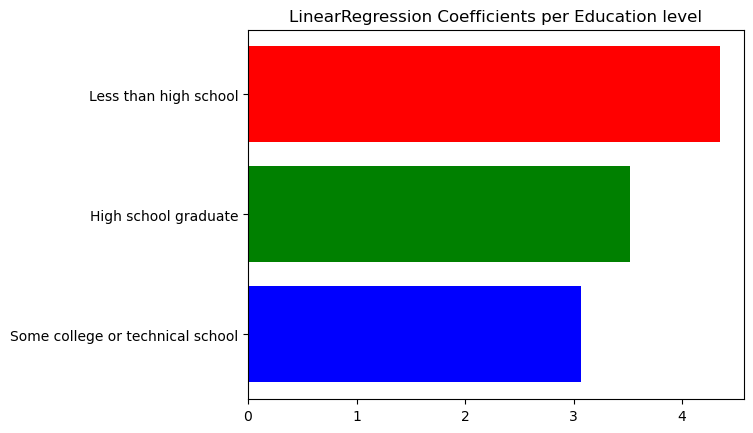

R^2: 0.48064179293608533


In [32]:
#plot the regression coefficients
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#Different colors for each bar, blue green red as bgr
plt.barh([0,1,2],lr_model.coef_, color = 'bgr')

#font size and title then show for hold to print the R^2 value after it
plt.yticks(range(3),data_Education.columns[5:8], fontsize = 10)
plt.title('LinearRegression Coefficients per Education level')
plt.show()

#print R^2 to show how much of the linear model it corralate to
print('R^2:',lr_model.score(x_train,y_train))

In [33]:
#now we can go and do the income part
data_Income.head(5)

YearStart LocationAbbr LocationDesc  \
0       2011           AL      Alabama   
1       2011           AL      Alabama   
2       2011           AL      Alabama   
3       2011           AL      Alabama   
4       2011           AL      Alabama   

                                            Question  Data_Value  \
0  Percent of adults aged 18 years and older who ...        38.5   
1  Percent of adults aged 18 years and older who ...        34.8   
2  Percent of adults aged 18 years and older who ...        35.8   
3  Percent of adults aged 18 years and older who ...        32.3   
4  Percent of adults aged 18 years and older who ...        34.1   

   Data_Value_Alt  Sample_Size Total Age(years) Education Gender  \
0            38.5       1112.0   NaN        NaN       NaN    NaN   
1            34.8       1367.0   NaN        NaN       NaN    NaN   
2            35.8        757.0   NaN        NaN       NaN    NaN   
3            32.3        861.0   NaN        NaN       NaN    NaN   
4            34.1        785.0   NaN        NaN       NaN    NaN   

              Income Race/Ethnicity                              GeoLocation  \
0  Less than $15,000            NaN  (32.84057112200048, -86.63186076199969)   
1  $15,000 - $24,999            NaN  (32.84057112200048, -86.63186076199969)   
2  $25,000 - $34,999            NaN  (32.84057112200048, -86.63186076199969)   
3  $35,000 - $49,999            NaN  (32.84057112200048, -86.63186076199969)   
4  $50,000 - $74,999            NaN  (32.84057112200048, -86.63186076199969)   

   LocationID StratificationCategory1    Stratification1  
0           1                  Income  Less than $15,000  
1           1                  Income  $15,000 - $24,999  
2           1                  Income  $25,000 - $34,999  
3           1                  Income  $35,000 - $49,999  
4           1                  Income  $50,000 - $74,999

In [34]:
#same approach for the previous ones
#filter by that question to get which year has the most relevant data 
data_Income = data_Income[data_Income['Question'] == Question[0]]
data_Income = data_Income[data_Income['YearStart'] == 2015]
data_Income.shape

(378, 17)

In [35]:
#Again same approach for the location and the cutoff of the uncecassary information
#we will remove unrelated state that will not serve in the region of the united statess
data_Income = data_Income[~(data_Income ['LocationDesc'] == 'National')]
data_Income = data_Income[~(data_Income ['LocationDesc'] == 'Guam')]
data_Income = data_Income[~(data_Income ['LocationDesc'] == 'Puerto Rico')]
data_Income = data_Income[~(data_Income ['LocationDesc'] == 'Virgin Islands')]
data_Income['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [36]:
#just like in the gender and education.
#reset the index then take only the relevant features to the income and obesity which is 4 in here as well
data_Income = data_Income.reset_index(drop = True)
data_Income = data_Income[['YearStart','LocationDesc','Data_Value','Income']]

In [37]:
#make a list of the different cases for the Income
data_Income_list = data_Income.Income.unique()

#we will assign 0 and 1 to the corssponding cell so that we can manipulate it easier later
for i in data_Income_list:
    data_Income [i] = data_Income['Income'].apply(lambda x: int(x==i))

#we need to account for the not reported data, unfortunatly there is a few so we need to remove them with a mask    
data_Income = data_Income[~(data_Income.Income == 'Data not reported')]     
data_Income.drop('Data not reported', inplace=True, axis=1)

#lets see how it became after the manipulation    
data_Income

YearStart LocationDesc  Data_Value              Income  \
1         2015      Alabama        32.7  $75,000 or greater   
2         2015      Alabama        34.6   $50,000 - $74,999   
3         2015      Alabama        36.5   $35,000 - $49,999   
4         2015      Alabama        38.8   $25,000 - $34,999   
5         2015      Alabama        39.3   $15,000 - $24,999   
..         ...          ...         ...                 ...   
352       2015      Wyoming        28.6   $50,000 - $74,999   
353       2015      Wyoming        30.1   Less than $15,000   
354       2015      Wyoming        30.1   $35,000 - $49,999   
355       2015      Wyoming        31.3   $25,000 - $34,999   
356       2015      Wyoming        35.9   $15,000 - $24,999   

     $75,000 or greater  $50,000 - $74,999  $35,000 - $49,999  \
1                     1                  0                  0   
2                     0                  1                  0   
3                     0                  0                  1   
4                     0                  0                  0   
5                     0                  0                  0   
..                  ...                ...                ...   
352                   0                  1                  0   
353                   0                  0                  0   
354                   0                  0                  1   
355                   0                  0                  0   
356                   0                  0                  0   

     $25,000 - $34,999  $15,000 - $24,999  Less than $15,000  
1                    0                  0                  0  
2                    0                  0                  0  
3                    0                  0                  0  
4                    1                  0                  0  
5                    0                  1                  0  
..                 ...                ...                ...  
352                  0                  0                  0  
353                  0                  0                  1  
354                  0                  0                  0  
355                  1                  0                  0  
356                  0                  1                  0  

[306 rows x 10 columns]

In [38]:
#now lets build a model to predict the linear regression coffecients for the income and obesity
#now lets define x and y 
x_income = data_Income[data_Income.columns[4:9]]
y_income = data_Income['Data_Value']

In [39]:
#now to define the train and test
#test_size of 0.2 following the examples we did and random_state of 42
x_income_train, x_income_test, y_income_train, y_income_test = train_test_split(x_income, y_income, test_size = 0.20, random_state = 42)

In [40]:
#define the model
lr_model_income = LinearRegression()

In [41]:
#train the model
lr_model_income.fit(x_income_train, y_income_train)

LinearRegression()

<ipython-input-42-c1c6d6b38e70>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh([0,1,2,3,4],lr_model_income.coef_,color = 'cbgmr')


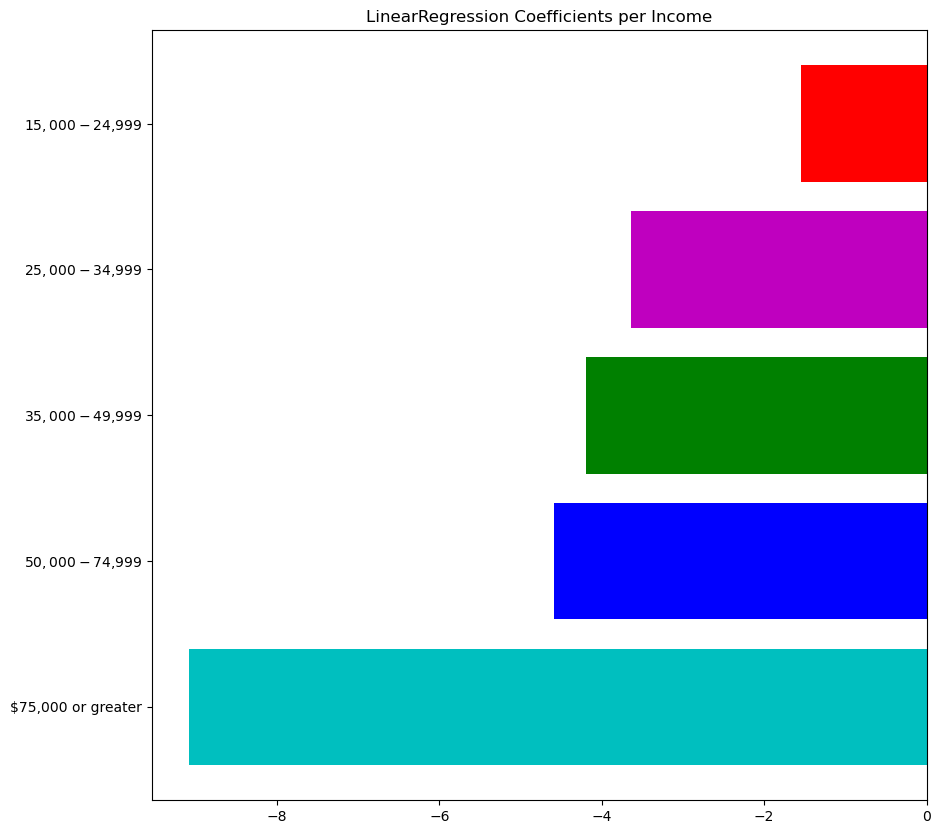

R^2: 0.3051295646395852


In [42]:
#plot the regression coefficients
#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#Different colors for each bar, blue green red as bgr
plt.figure(figsize = (10,10))
plt.barh([0,1,2,3,4],lr_model_income.coef_,color = 'cbgmr')

#font size and title then show for hold to print the R^2 value after it
plt.yticks(range(5), data_Income.columns[4:9], fontsize = 10)
plt.title('LinearRegression Coefficients per Income')
plt.show()

#print R^2 to show how much of the linear model it corralate to
print('R^2:',lr_model_income.score(x_income_train,y_income_train))

In [43]:
#now lets take a look at how the obesity rate is connected to the income 
#since it is a little messy to order the graphed bars according to the numbers in range
#lets create a new column with orderd with with how we like it
data_Income_ave = data_Income.groupby('Income', as_index = False).mean()

#print before rearranging
data_Income_ave

Income  YearStart  Data_Value  $75,000 or greater  \
0   $15,000 - $24,999       2015   33.284314                   0   
1   $25,000 - $34,999       2015   32.066667                   0   
2   $35,000 - $49,999       2015   30.921569                   0   
3   $50,000 - $74,999       2015   30.452941                   0   
4  $75,000 or greater       2015   25.811765                   1   
5   Less than $15,000       2015   35.086275                   0   

   $50,000 - $74,999  $35,000 - $49,999  $25,000 - $34,999  $15,000 - $24,999  \
0                  0                  0                  0                  1   
1                  0                  0                  1                  0   
2                  0                  1                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   

   Less than $15,000  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  1

In [44]:
#print after rearranging
data_Income_ave['IncomeOrder'] = [1,2,3,4,5,0]
data_Income_ave

Income  YearStart  Data_Value  $75,000 or greater  \
0   $15,000 - $24,999       2015   33.284314                   0   
1   $25,000 - $34,999       2015   32.066667                   0   
2   $35,000 - $49,999       2015   30.921569                   0   
3   $50,000 - $74,999       2015   30.452941                   0   
4  $75,000 or greater       2015   25.811765                   1   
5   Less than $15,000       2015   35.086275                   0   

   $50,000 - $74,999  $35,000 - $49,999  $25,000 - $34,999  $15,000 - $24,999  \
0                  0                  0                  0                  1   
1                  0                  0                  1                  0   
2                  0                  1                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   

   Less than $15,000  IncomeOrder  
0                  0            1  
1                  0            2  
2                  0            3  
3                  0            4  
4                  0            5  
5                  1            0

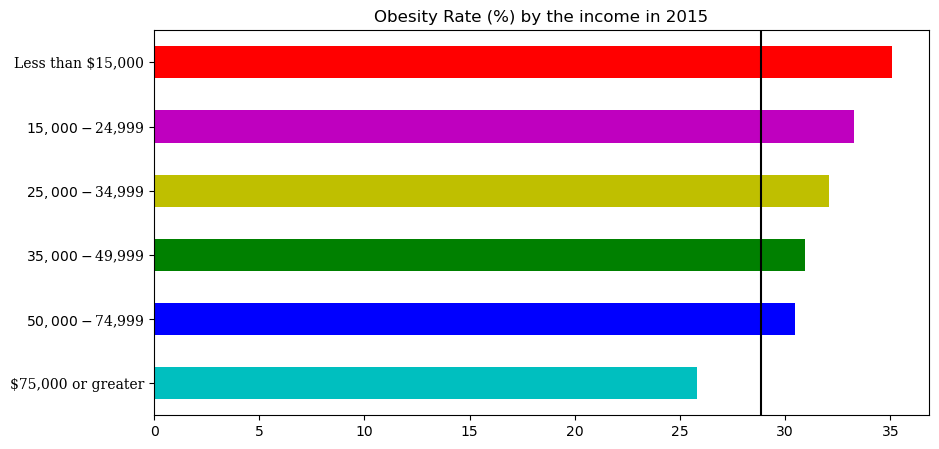

In [45]:
#sort the data by the new column created
data_Income = data_Income_ave.sort_values(['IncomeOrder'], ascending = [False])

#first we reset the runtime matplot 
plt.rcParams.update(plt.rcParamsDefault)

#set the size and kind of graph and colors
plt.figure(figsize = (10,5)) 
data_Income.Data_Value.plot(kind = 'barh',color = ['c','b','g','y','m','r'])

#set the title, color and other things
plt.yticks(range(6), data_Income.Income, fontsize = 10, family = 'serif')
plt.plot([ave,ave], [-1,6], '-', color = 'k')
plt.title('Obesity Rate (%) by the income in 2015')

#hold
plt.show()